In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from mpl_toolkits.mplot3d import axes3d, Axes3D
import re
import warnings # Turn off warnings
warnings.filterwarnings('ignore')
# Pandas options
pd.set_option("max_rows", 30)
pd.set_option("max_columns", None)
pd.set_option("precision", 3)

In [2]:
turnstile_norm = pd.read_csv(r"data/turnstile/concat-csv/turnstile-edt-cat.csv")
turnstile_norm = turnstile_norm.rename(columns = {"Unnamed: 0" : "DateTime"}).set_index("DateTime") # Formatting
turnstile_norm # Preview

,34 ST-HERALD SQ,TIMES SQ-42 ST,34 ST-PENN STA,59 ST COLUMBUS,86 ST,GRD CNTRL-42 ST,59 ST,FLUSHING-MAIN,ATL AV-BARCLAY,23 ST,42 ST-PORT AUTH,14 ST,JKSN HT-ROOSVLT,BEDFORD AV,47-50 STS ROCK,34 ST-HUDSON YD,CHAMBERS ST,125 ST,57 ST-7 AV,GRAND ST,145 ST,42 ST-BRYANT PK,2 AV,50 ST,CHURCH AV,PRINCE ST,SPRING ST,LEXINGTON AV/63,NOSTRAND AV,JAY ST-METROTEC,1 AV,STEINWAY ST,JUNCTION BLVD,DEKALB AV,BOROUGH HALL,CROWN HTS-UTICA,8 ST-NYU,CANAL ST,QUEENSBORO PLZ,MYRTLE-WYCKOFF,51 ST,COURT SQ,JAMAICA CENTER,49 ST,BOWLING GREEN,BLEECKER ST,VERNON-JACKSON,28 ST,SUTPHIN-ARCHER,FORDHAM RD,HIGH ST,BROOKLYN BRIDGE,103 ST-CORONA,GRAND-NEWTOWN,181 ST,167 ST,82 ST-JACKSON H,KINGS HWY,3 AV-149 ST,EAST BROADWAY,72 ST,WALL ST,21 ST-QNSBRIDGE,HOYT-SCHER,FRANKLIN AV,168 ST,NEVINS ST,5 AVE,PROSPECT PARK,CENTRAL PK N110,LEXINGTON AV/53,63 DR-REGO PARK,3 AV,175 ST,53 ST,110 ST,BEDFORD-NOSTRAN,GRAHAM AV,46 ST BLISS ST,CHRISTOPHER ST,191 ST,ROOSEVELT ISLND,BROADWAY JCT,HOYT ST,135 ST,ELMHURST AV,RECTOR ST,4AV-9 ST,96 ST,JAMAICA 179 ST,BRIGHTON BEACH,CARROLL ST,149/GRAND CONC,UNION ST,111 ST,MONTROSE AV,MORGAN AV,90 ST-ELMHURST,6 AV,BOWERY,BURNSIDE AV,45 ST,170 ST,169 ST,74 ST-BROADWAY,40 ST LOWERY ST,CASTLE HILL AV,HALSEY ST,CLARK ST,SUTTER AV-RUTLD,EASTN PKWY-MUSM,BAY RIDGE AV,OZONE PK LEFFRT,JEFFERSON ST,MORISN AV/SNDVW,207 ST,EUCLID AV,GRAND ARMY PLAZ,PARSONS BLVD,231 ST,SMITH-9 ST,4 AV-9 ST,67 AV,ROCKAWAY AV,PELHAM BAY PARK,CLASSON AV,NEW LOTS AV,GRANT AV,STERLING ST,PROSPECT AV,18 ST,SARATOGA AV,WILSON AV,V.CORTLANDT PK,WESTCHESTER SQ,FAR ROCKAWAY,WOODLAWN,CORTELYOU RD,BERGEN ST,BEDFORD PK BLVD,HARLEM 148 ST,BAY RIDGE-95 ST,CLINTON-WASH AV,KINGSTON-THROOP,ST LAWRENCE AV,176 ST,FULTON ST,AVENUE J,183 ST,18 AV,KINGSTON AV,BEVERLEY ROAD,71 ST,ST. GEORGE,MT EDEN AV,MARBLE HILL-225,174-175 STS,33 ST-RAWSON ST,CITY HALL,182-183 STS,PRESIDENT ST,77 ST,GUN HILL RD,79 ST,190 ST,20 AV,25 ST,BRIARWOOD,AQUEDUCT RACETR,PENNSYLVANIA AV,AVENUE M,OCEAN PKWY,AVENUE H,JUNIUS ST,NECK RD,VAN SICLEN AV,138/GRAND CONC,BEVERLY RD,75 AV,BUSHWICK AV,BEACH 67 ST,WHITLOCK AV,W 8 ST-AQUARIUM,PARK PLACE,215 ST,HOWARD BCH JFK,BEACH 25 ST,BEACH 60 ST,ATLANTIC AV,BEACH 36 ST,55 ST,104 ST,BEACH 44 ST,WORLD TRADE CTR,NASSAU AV,39 AV,36 AV,BROADWAY,COURT SQ-23 ST,ASTORIA DITMARS,CYPRESS HILLS,30 AV,121 ST,75 ST-ELDERTS,AVENUE X,AVENUE P,85 ST-FOREST PK,WOODHAVEN BLVD,METROPOLITAN AV,GREENPOINT AV
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-03-24 00:00:00,5290.0,7404.0,3990.0,3229.0,1766.0,2730.0,2384.0,2193.0,1903.0,1740.0,2029.0,1982.0,3342.0,3657.0,1696.0,315.0,1377.0,2741.0,1425.0,1648.0,2900.0,1774.0,1866.0,3014.0,2101.0,578.0,768.0,1245.0,1.406e+03,1212.0,2769.0,1179.0,1504.0,1159.0,734.0,1419.0,1229.0,760.0,1087.0,1708.0,811.0,7.260e+02,1874.0,1290.0,940.0,1088.0,633.0,825.0,1494.0,886.0,498.0,504.0,1475.0,667.0,941.0,1096.0,1200.0,646.0,646.0,545.0,130.0,72.0,646.0,474.0,636.0,1055.0,443.0,417.0,758.0,40.0,1401.0,245.0,1057.0,440.0,481.0,684.0,531.0,775.0,890.0,1035.0,743.0,359.0,938.0,8.0,87.0,250.0,433.0,379.0,181.0,666.0,283.0,333.0,899.0,455.0,748.0,602.0,631.0,775.0,314.0,433.0,412.0,310.0,461.0,435.0,265.0,547.0,595.0,792.0,0.0,457.0,242.0,222.0,429.0,737.0,539.0,303.0,333.0,122.0,439.0,189.0,257.0,321.0,251.0,355.0,302.0,399.0,487.0,457.0,207.0,254.0,323.0,399.0,509.0,308.0,311.0,390.0,237.0,163.0,138.0,206.0,41.0,218.0,413.0,639.0,476.0,252.0,243.0,121.0,249.0,93.0,271.0,270.0,166.0,385.0,293.0,131.0,156.0,183.0,68.0,259.0,299.0,121.0,121.0,117.0,0.0,130.0,269.0,149.0,267.0,157.0,55.0,104.0,116.0,161.0,58.0,217.0,180.0,94.0,92.0,223.0,201.0,131.0,38.0,6.0,87.0,NaN,201.0,217.0,68.0,110.0,48.0,82.0,100.0,455.0,450.0,0.0,NaN,0.0,183.0,24.0,47.0,NaN,65.0,114.0,1.0,0.0,158.0,158.0,84.0,501.0
2018-03-24 04:00:00,4989.0,4979.0,5309.0,3309.0,3356.0,3683.0,4598.0,5716.0,2097.0,1563.0,5052.0,1179.0,5215.0,

In [3]:
turnstile_dst = pd.read_csv(r"data/turnstile/concat-csv/turnstile-est-cat.csv")
turnstile_dst = turnstile_dst.rename(columns = {"Unnamed: 0" : "DateTime"}).set_index("DateTime") # formatting
turnstile_dst # Preview

,34 ST-HERALD SQ,TIMES SQ-42 ST,34 ST-PENN STA,59 ST COLUMBUS,86 ST,GRD CNTRL-42 ST,59 ST,FLUSHING-MAIN,ATL AV-BARCLAY,23 ST,42 ST-PORT AUTH,14 ST,JKSN HT-ROOSVLT,BEDFORD AV,47-50 STS ROCK,34 ST-HUDSON YD,CHAMBERS ST,125 ST,57 ST-7 AV,GRAND ST,145 ST,42 ST-BRYANT PK,2 AV,50 ST,CHURCH AV,PRINCE ST,SPRING ST,LEXINGTON AV/63,NOSTRAND AV,JAY ST-METROTEC,1 AV,STEINWAY ST,JUNCTION BLVD,DEKALB AV,BOROUGH HALL,CROWN HTS-UTICA,8 ST-NYU,CANAL ST,QUEENSBORO PLZ,MYRTLE-WYCKOFF,51 ST,COURT SQ,JAMAICA CENTER,49 ST,BOWLING GREEN,BLEECKER ST,VERNON-JACKSON,28 ST,SUTPHIN-ARCHER,FORDHAM RD,HIGH ST,BROOKLYN BRIDGE,103 ST-CORONA,GRAND-NEWTOWN,181 ST,167 ST,82 ST-JACKSON H,KINGS HWY,3 AV-149 ST,EAST BROADWAY,72 ST,WALL ST,21 ST-QNSBRIDGE,HOYT-SCHER,FRANKLIN AV,168 ST,NEVINS ST,5 AVE,PROSPECT PARK,CENTRAL PK N110,LEXINGTON AV/53,63 DR-REGO PARK,3 AV,175 ST,53 ST,110 ST,BEDFORD-NOSTRAN,GRAHAM AV,46 ST BLISS ST,CHRISTOPHER ST,191 ST,ROOSEVELT ISLND,BROADWAY JCT,HOYT ST,135 ST,ELMHURST AV,RECTOR ST,4AV-9 ST,96 ST,JAMAICA 179 ST,BRIGHTON BEACH,CARROLL ST,149/GRAND CONC,UNION ST,111 ST,MONTROSE AV,MORGAN AV,90 ST-ELMHURST,6 AV,BOWERY,BURNSIDE AV,45 ST,170 ST,169 ST,74 ST-BROADWAY,40 ST LOWERY ST,CASTLE HILL AV,HALSEY ST,CLARK ST,SUTTER AV-RUTLD,EASTN PKWY-MUSM,BAY RIDGE AV,OZONE PK LEFFRT,JEFFERSON ST,MORISN AV/SNDVW,207 ST,EUCLID AV,GRAND ARMY PLAZ,PARSONS BLVD,231 ST,SMITH-9 ST,4 AV-9 ST,67 AV,ROCKAWAY AV,PELHAM BAY PARK,CLASSON AV,NEW LOTS AV,GRANT AV,STERLING ST,PROSPECT AV,18 ST,SARATOGA AV,WILSON AV,V.CORTLANDT PK,WESTCHESTER SQ,FAR ROCKAWAY,WOODLAWN,CORTELYOU RD,BERGEN ST,BEDFORD PK BLVD,HARLEM 148 ST,BAY RIDGE-95 ST,CLINTON-WASH AV,KINGSTON-THROOP,ST LAWRENCE AV,176 ST,FULTON ST,AVENUE J,183 ST,18 AV,KINGSTON AV,BEVERLEY ROAD,71 ST,ST. GEORGE,MT EDEN AV,MARBLE HILL-225,174-175 STS,33 ST-RAWSON ST,CITY HALL,182-183 STS,PRESIDENT ST,77 ST,GUN HILL RD,79 ST,190 ST,20 AV,25 ST,BRIARWOOD,AQUEDUCT RACETR,PENNSYLVANIA AV,AVENUE M,OCEAN PKWY,AVENUE H,JUNIUS ST,NECK RD,VAN SICLEN AV,138/GRAND CONC,BEVERLY RD,75 AV,BUSHWICK AV,BEACH 67 ST,WHITLOCK AV,W 8 ST-AQUARIUM,PARK PLACE,215 ST,HOWARD BCH JFK,BEACH 25 ST,BEACH 60 ST,ATLANTIC AV,BEACH 36 ST,55 ST,104 ST,BEACH 44 ST,WORLD TRADE CTR,NASSAU AV,39 AV,36 AV,BROADWAY,COURT SQ-23 ST,ASTORIA DITMARS,CYPRESS HILLS,30 AV,121 ST,75 ST-ELDERTS,AVENUE X,AVENUE P,85 ST-FOREST PK,WOODHAVEN BLVD,METROPOLITAN AV,GREENPOINT AV
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-11-10 03:00:00,3085.0,2930.0,3953.0,1930.0,2600.0,1738.0,3234.0,3217.0,1513.0,826.0,2422.0,1379.0,4026.0,6.0,1540.0,755.0,1043.0,1822.0,772.0,593.0,1994.0,1082.0,706.0,1401.0,1359.0,289.0,384.0,784.0,1068.0,814.0,5.0,515.0,2522.0,482.0,489.0,1430.0,365.0,515.0,589.0,1209.0,433.0,750.0,2500.0,641.0,503.0,374.0,398.0,379.0,1722.0,1564.0,228.0,342.0,2540.0,810.0,798.0,1061.0,1132.0,508.0,1297.0,403.0,104.0,416.0,584.0,248.0,421.0,1220.0,316.0,266.0,958.0,558.0,848.0,440.0,7.0,593.0,640.0,515.0,252.0,13.0,885.0,316.0,550.0,152.0,1437.0,201.0,593.0,193.0,231.0,272.0,134.0,1511.0,497.0,169.0,1055.0,251.0,1305.0,5.0,16.0,1546.0,66.0,263.0,948.0,466.0,777.0,606.0,212.0,480.0,616.0,19.0,100.0,517.0,111.0,390.0,810.0,18.0,721.0,373.0,753.0,120.0,633.0,480.0,302.0,159.0,214.0,376.0,484.0,186.0,530.0,539.0,203.0,222.0,145.0,407.0,0.0,464.0,471.0,575.0,440.0,204.0,79.0,384.0,267.0,253.0,204.0,361.0,486.0,365.0,163.0,202.0,598.0,585.0,175.0,138.0,452.0,18.0,437.0,287.0,NaN,360.0,62.0,421.0,177.0,181.0,325.0,363.0,115.0,301.0,79.0,200.0,172.0,268.0,147.0,113.0,107.0,133.0,198.0,214.0,334.0,274.0,30.0,0.0,218.0,231.0,52.0,59.0,64.0,353.0,190.0,230.0,57.0,94.0,101.0,176.0,81.0,445.0,392.0,NaN,354.0,NaN,181.0,617.0,17.0,474.0,10.0,14.0,235.0,159.0,29.0,23.0,195.0,332.0
2018-11-10 07:00:00,18163.0,15305.0,18742.0,13627.0,16370.0,11563.0,16691.0,15589.0,8376.0,7100.0,13659.0,7811.0,14631.0,12.0,

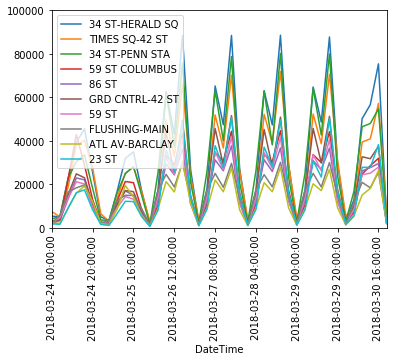

In [4]:
turnstile_norm.iloc[:42, 0:10].plot(ylim = (0, 100000), xticks=None)
plt.xticks(rotation=90)
plt.savefig("figures/week-data.png", bbox_inches="tight")
plt.show()